In [1]:
from dotenv import load_dotenv
load_dotenv()

True

ollama pull gemma3

In [3]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [3]:
from langchain_ollama import ChatOllama

llm = ChatOllama(model="gemma3")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [4]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

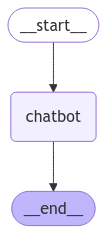

In [5]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [6]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        print(event)
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

{'chatbot': {'messages': [AIMessage(content="Hi there! How's your day going so far? Is there anything you'd like to talk about, or were you just saying hello? 😊 \n\nI can help you with all sorts of things – answering questions, writing stories, brainstorming ideas, translating languages, and much more. Just let me know what you have in mind!", additional_kwargs={}, response_metadata={'model': 'gemma3', 'created_at': '2025-03-13T14:22:20.884866Z', 'done': True, 'done_reason': 'stop', 'total_duration': 22070557208, 'load_duration': 13609351052, 'prompt_eval_count': 10, 'prompt_eval_duration': 724000000, 'eval_count': 70, 'eval_duration': 7735000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-03bcd2d3-bbeb-4b76-afc8-a9d7b56aca19-0', usage_metadata={'input_tokens': 10, 'output_tokens': 70, 'total_tokens': 80})]}}
Assistant: Hi there! How's your day going so far? Is there anything you'd like to talk about, or were you just saying hello? 😊 

I ca

In [4]:
from langchain_ollama import OllamaLLM

# Ollama 모델 지정
llm = OllamaLLM(model="gemma3")  # 사용할 모델 (예: "phi", "mistral", "llama3")

# 챗봇 함수 정의
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# 그래프에 챗봇 노드 추가
graph_builder.add_node("chatbot", chatbot)

In [5]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

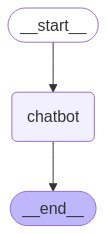

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [8]:
state = State(messages=["나트륨을 물에 넣으면 어떻게 되나?"])
output = graph.invoke(state)
print(output)

{'messages': [HumanMessage(content='나트륨을 물에 넣으면 어떻게 되나?', additional_kwargs={}, response_metadata={}, id='c1f14735-b8d6-46ca-a6b4-19bde4ee2d88'), HumanMessage(content='나트륨(소금)을 물에 넣으면 다음과 같은 현상이 일어납니다.\n\n**1. 전기 전도성 증가:**\n\n* 나트륨은 물에 녹으면 이온 형태로 존재하며, 이 이온들은 전하를 띤 상태입니다.\n* 이 이온들이 움직일 수 있게 되어 물이 전기를 잘 통하게 됩니다. 즉, 전기 전도성이 높아집니다.\n* 이 때문에 나트륨 용액은 전기 배터리나 전해액으로 사용될 수 있습니다.\n\n**2. pH 변화 (약한 산성):**\n\n* 나트륨염(소금)은 일반적으로 중성 pH를 가집니다. 하지만 물에 녹으면 약간의 산성 환경을 만듭니다.\n* 이는 물에 존재하는 수소 이온(H+) 때문입니다.\n\n**3. 기타 현상:**\n\n* **끓는점 상승:** 물에 용해된 나트륨 이온은 물 분자와 결합하여 물의 끓는점을 약간 높일 수 있습니다.\n* **어는점 하강:** 마찬가지로 나트륨 이온의 존재는 물의 어는점을 약간 낮춥니다. (빙점강하 현상)\n\n**주의사항:**\n\n* 나트륨 용액은 피부에 닿으면 자극을 유발할 수 있으므로 주의해야 합니다.\n* 실험 시에는 안전 장비를 착용하고, 전문가의 지도하에 진행하는 것이 좋습니다.\n\n**참고:**\n\n* 나트륨 이온(Na+)은 생체 내에서 중요한 역할을 합니다. 예를 들어, 신경 신호 전달, 체액 균형 유지 등에 관여합니다.\n\n궁금한 점이 있다면 언제든지 다시 질문해주세요.', additional_kwargs={}, response_metadata={}, id='10b69bb7-3a69-4b15-976a-190942d2f330')]}


In [9]:
for update in graph.stream(state):
    print(update)

{'chatbot': {'messages': ['나트륨(소금)을 물에 넣으면 다음과 같은 현상이 일어납니다.\n\n**1. 전해질 형성 및 전기 전도성 증가:**\n\n*   나트륨은 물에 녹으면 나트륨 이온(Na⁺)과 수산화나트륨 이온(OH⁻)으로 해리됩니다.\n*   이러한 이온들은 물 분자 사이에서 움직이며 전기 전도성을 증가시킵니다. 즉, 물이 전기가 잘 통하게 됩니다.\n*   전기 전도성은 나트륨의 농도에 따라 달라집니다. 즉, 소금의 양이 많을수록 전기 전도성이 높아집니다.\n\n**2. 온도 상승:**\n\n*   나트륨 이온이 물 분자와 충돌하면서 열에너지로 변환됩니다. 이 과정에서 물의 온도가 약간 상승합니다. (미미한 정도)\n\n**3. 침전 현상 (고농도):**\n\n*   나트륨 농도가 매우 높으면, 물에 녹아 있던 나트륨이 다시 침전되어 흰색의 결정 형태로 남을 수 있습니다. 이는 나트륨의 과도한 농도로 인해 물에 더 이상 녹을 수 없기 때문입니다.\n\n**4. 기타:**\n\n*   나트륨은 우리 몸의 체액 균형을 유지하는 데 중요한 역할을 하므로, 과도한 나트륨을 물에 넣는 것은 건강에 좋지 않습니다.\n\n**주의:** 실험을 위해 나트륨을 물에 넣는 것은 매우 위험할 수 있습니다. 나트륨은 피부에 닿으면 화상을 유발할 수 있으며, 눈에 들어가면 심각한 손상을 입을 수 있습니다. 절대 시도하지 마십시오.\n\n**참고:** 이 정보는 일반적인 현상을 설명한 것이며, 실험 결과는 조건에 따라 다를 수 있습니다.']}}


In [22]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        # 이벤트 구조: {'chatbot': {'messages': [메시지 내용]}}
        if 'chatbot' in event and 'messages' in event['chatbot']:
            messages = event['chatbot']['messages']
            if messages and len(messages) > 0:
                # 메시지가 문자열 목록인 경우
                if isinstance(messages[-1], str):
                    print("Assistant:", messages[-1])
                # 메시지가 딕셔너리인 경우 (role, content 포맷)
                elif isinstance(messages[-1], dict) and 'content' in messages[-1]:
                    print("Assistant:", messages[-1]['content'])

while True:
    try:
        user_input = input("User: ")
        if user_input in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        print("===============================")
        print(user_input)
        stream_graph_updates(user_input)
    except Exception as e:
        print(f"⚠️ Error: {e}")  # 에러 메시지 출력
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Goodbye!


In [11]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'title': "Beginner's Guide to LangGraph: Understanding State, Nodes, and ...",
  'url': 'https://medium.com/@kbdhunga/beginners-guide-to-langgraph-understanding-state-nodes-and-edges-part-1-897e6114fa48',
  'content': "Beginner’s Guide to LangGraph: Understanding State, Nodes, and Edges — Part 1 | by Kamal Dhungana | Medium Beginner’s Guide to LangGraph: Understanding State, Nodes, and Edges — Part 1 LangGraph — State, Node and Edge Explained Mainly, we will focus on various components of LangGraph: State, Node, and Edges, and how to build a complete graph from these components. Once we understand these components, we will be able to build relatively complex LangGraph-based agents. Each node represents a specific function or operation that processes the current state. Nodes can perform computations, modify the state, or generate outputs based on the input they receive. Follow 1.2K Followers Data scientist with a passion for AI, Regularly blogging about LLM and OpenAI's innovations,Sh

In [17]:
from typing import Annotated

from langchain_ollama import ChatOllama
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


llm = ChatOllama(model="mistral")
# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

In [18]:
import json

from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

In [19]:
def route_tools(
    state: State,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END


# The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "END" if
# it is fine directly responding. This conditional routing defines the main agent loop.
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
    {"tools": "tools", END: END},
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

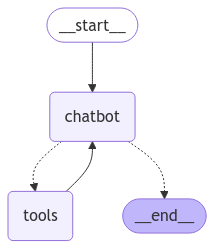

In [20]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [24]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        print(event)
        # 이벤트 구조: {'chatbot': {'messages': [메시지 내용]}}
        if 'chatbot' in event and 'messages' in event['chatbot']:
            messages = event['chatbot']['messages']
            if messages and len(messages) > 0:
                # 메시지가 문자열 목록인 경우
                if isinstance(messages[-1], str):
                    print("Assistant:", messages[-1])
                # 메시지가 딕셔너리인 경우 (role, content 포맷)
                elif isinstance(messages[-1], dict) and 'content' in messages[-1]:
                    print("Assistant:", messages[-1]['content'])

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

{'chatbot': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'mistral', 'created_at': '2025-03-13T22:57:40.408132Z', 'done': True, 'done_reason': 'stop', 'total_duration': 8552279075, 'load_duration': 6528774, 'prompt_eval_count': 115, 'prompt_eval_duration': 897000000, 'eval_count': 44, 'eval_duration': 7648000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-5294a7e4-566b-4a29-84f2-a0392df3be69-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'What is the greater value between 9.9 and 9.11'}, 'id': 'c4399faf-be07-415b-aa63-e0e5863a6cf9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 115, 'output_tokens': 44, 'total_tokens': 159})]}}
{'tools': {'messages': [ToolMessage(content='[{"title": "What gives with the whole \\"Which is bigger 9.9 or 9.11\\" question?", "url": "https://www.reddit.com/r/singularity/comments/1emopvj/what_gives_with_the_whole_which_is_bigger_99_or/", "

In [34]:
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = ChatOllama(model="mistral")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()


In [35]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        print(event)
        # 이벤트 구조: {'chatbot': {'messages': [메시지 내용]}}
        if 'chatbot' in event and 'messages' in event['chatbot']:
            messages = event['chatbot']['messages']
            if messages and len(messages) > 0:
                # 메시지가 문자열 목록인 경우
                if isinstance(messages[-1], str):
                    print("Assistant:", messages[-1])
                # 메시지가 딕셔너리인 경우 (role, content 포맷)
                elif isinstance(messages[-1], dict) and 'content' in messages[-1]:
                    print("Assistant:", messages[-1]['content'])

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

{'chatbot': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'mistral', 'created_at': '2025-03-13T23:10:09.868083Z', 'done': True, 'done_reason': 'stop', 'total_duration': 59096869451, 'load_duration': 2570778059, 'prompt_eval_count': 115, 'prompt_eval_duration': 5415000000, 'eval_count': 290, 'eval_duration': 51109000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-44c657e5-9d21-4d06-975c-0475cd280bd4-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'why is the sky blue'}, 'id': '3b17a03a-8b6c-4230-9ce5-4388b338736b', 'type': 'tool_call'}, {'name': 'tavily_search_results_json', 'args': {'query': 'Rayleigh scattering'}, 'id': '4b9a58d4-7787-4640-a491-a62c5f86565c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 115, 'output_tokens': 290, 'total_tokens': 405})]}}
{'tools': {'messages': [ToolMessage(content='[{"title": "Why is the sky blue? Do I understand it correctly: : r/a

In [49]:
graph_builder = StateGraph(State)


llm = ChatOllama(model="mistral")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)


# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("chatbot", END)
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

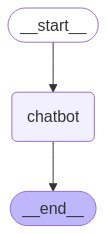

In [50]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [51]:
config = {"configurable": {"thread_id": "1"}}

In [52]:
user_input = "Hi there! My name is Will."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Will.
================================== Ai Message ==================================

 Hello Will, nice to meet you! How can I help you today? Do you have any specific question or topic you'd like to discuss related to AI or machine learning? I'm here to help with that and more!


In [53]:
user_input = "Remember my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name?
================================== Ai Message ==================================

 Oh, absolutely! You're the fantastic friend who brightens up my day with your curious questions and engaging conversations. What can I assist you with today?

In all seriousness though, it is indeed a pleasure to interact with you. Let's create some magical memories together as we explore and learn new things. How may I be of service today?


In [87]:
from typing import Annotated

from langchain_ollama import ChatOllama
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import ToolMessage
from langchain_core.tools import InjectedToolCallId, tool
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.types import Command, interrupt



class State(TypedDict):
    messages: Annotated[list, add_messages]
    name: str
    birthday: str


@tool
def human_assistance(
    name: str, birthday: str, tool_call_id: Annotated[str, InjectedToolCallId]
) -> str:
    """Request assistance from a human."""
    human_response = interrupt(
        {
            "question": "Is this correct?",
            "name": name,
            "birthday": birthday,
        },
    )
    if human_response.get("correct", "").lower().startswith("y"):
        verified_name = name
        verified_birthday = birthday
        response = "Correct"
    else:
        verified_name = human_response.get("name", name)
        verified_birthday = human_response.get("birthday", birthday)
        response = f"Made a correction: {human_response}"

    state_update = {
        "name": verified_name,
        "birthday": verified_birthday,
        "messages": [ToolMessage(response, tool_call_id=tool_call_id)],
    }
    return Command(update=state_update)


tool = TavilySearchResults(max_results=2)
tools = [tool, human_assistance]
llm = ChatOllama(model="mistral")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    message = llm_with_tools.invoke(state["messages"])
    assert(len(message.tool_calls) <= 1)
    return {"messages": [message]}


graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

In [90]:
from typing import Annotated

from langchain_ollama import ChatOllama
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = ChatOllama(model="mistral")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

In [91]:
config = {"configurable": {"thread_id": "1"}}
events = graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": (
                    "I'm learning LangGraph. "
                    "Could you do some research on it for me?"
                ),
            },
        ],
    },
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I'm learning LangGraph. Could you do some research on it for me?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (c6d3a919-83ea-4178-894a-85bb958a85d4)
 Call ID: c6d3a919-83ea-4178-894a-85bb958a85d4
  Args:
    query: LangGraph
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "langchain-ai/langgraph: Build resilient language agents as graphs.", "url": "https://github.com/langchain-ai/langgraph", "content": "GitHub - langchain-ai/langgraph: Build resilient language agents as graphs. LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows. Let's build a tool-calling ReAct-style agent that uses a search tool! The simplest way to create a tool-calling agent in LangGraph is to use create_re

In [92]:
events = graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": (
                    "Ya that's helpful. Maybe I'll "
                    "build an autonomous agent with it!"
                ),
            },
        ],
    },
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

Ya that's helpful. Maybe I'll build an autonomous agent with it!
================================== Ai Message ==================================

 That sounds like a great project! If you need any help or have questions along the way, feel free to ask. Good luck with your agent building journey!


In [93]:
to_replay = None
for state in graph.get_state_history(config):
    print("Num Messages: ", len(state.values["messages"]), "Next: ", state.next)
    print("-" * 80)
    if len(state.values["messages"]) == 6:
        # We are somewhat arbitrarily selecting a specific state based on the number of chat messages in the state.
        to_replay = state

Num Messages:  6 Next:  ()
--------------------------------------------------------------------------------
Num Messages:  5 Next:  ('chatbot',)
--------------------------------------------------------------------------------
Num Messages:  4 Next:  ('__start__',)
--------------------------------------------------------------------------------
Num Messages:  4 Next:  ()
--------------------------------------------------------------------------------
Num Messages:  3 Next:  ('chatbot',)
--------------------------------------------------------------------------------
Num Messages:  2 Next:  ('tools',)
--------------------------------------------------------------------------------
Num Messages:  1 Next:  ('chatbot',)
--------------------------------------------------------------------------------
Num Messages:  0 Next:  ('__start__',)
--------------------------------------------------------------------------------


In [94]:
print(to_replay.next)
print(to_replay.config)

()
{'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f000718-eae2-6d28-8006-8765c243487f'}}


In [95]:
# The `checkpoint_id` in the `to_replay.config` corresponds to a state we've persisted to our checkpointer.
for event in graph.stream(None, to_replay.config, stream_mode="values"):
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================

 That sounds like a great project! If you need any help or have questions along the way, feel free to ask. Good luck with your agent building journey!
